### ***Mental Health Prediction : Tech Mindscape***

Major goal of this project is to optimize treatment decision-making, increase the likelihood of positive outcomes, and improve the overall quality of
mental healthcare, while attempting to find the best model to predict the treatment requirement by experimenting with various ML algorithms.

Additionally, the project aims at exploring and quantifying the mutual influences between features like age, physical health factors and mental health treatment, which is achieved by conducting exhaustive analysis of every feature and visualizing the correlation.

## **Data Pre Processing**

**Understanding the Dataset**

In [ ]:
#Importing necessary libraries, loading Data Frame and printing first few rows
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mentalHealthDF = pd.read_csv("Mental Health Survey.csv")

print("Number of Rows: {}".format(mentalHealthDF.shape[0]))
print("Number of Columns: {}".format(mentalHealthDF.shape[1]))

mentalHealthDF.head()

Number of Rows: 1259
Number of Columns: 27


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
#Check for missing values in Dataframe

nullCount = mentalHealthDF.isnull().sum().sum()

print("Number of missing values in Data frame: {}".format(nullCount))

Number of missing values in Data frame: 1892


In [ ]:
#Print Number of missing values per column

print("The number of missing values per column : \n{}".format(mentalHealthDF.isnull().sum()))

The number of missing values per column : 
Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


In [ ]:
#Print Number of unique values per column

print("The number of Unique values per column : \n{}".format(mentalHealthDF.nunique()))

The number of Unique values per column : 
Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64


In [ ]:
#Print data types in column

print("The data type of each column : \n{}".format(mentalHealthDF.dtypes))

The data type of each column : 
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     obj

**Observations from data exploration:**



1.   The columns state, self_employed, work_interfere, comments* are the columns that have missing values.
2.   The columns Age, Gender, Country and state have the most number of unique values.
3. Most of the columns of dtype "object"

*Will be used for sentiment analysis as a extension for this project

## **Data Cleaning**

In [ ]:
#Dropping columns which will not be used
mentalHealthDF = mentalHealthDF.drop(['comments', 'state', 'Timestamp'], axis = 1)

mentalHealthDF.head()

print("Number of Rows after dropping: {}".format(mentalHealthDF.shape[0]))
print("Number of Columns after dropping: {}".format(mentalHealthDF.shape[1]))

Number of Rows after dropping: 1259
Number of Columns after dropping: 24


In [ ]:
#assigning default values for each data type that will replace missing values
intDef = 0
strDef = 'undefined'

for feature in mentalHealthDF:
  if feature == 'Age':
    mentalHealthDF[feature] = mentalHealthDF[feature].fillna(intDef)
  else:
    mentalHealthDF[feature] = mentalHealthDF[feature].fillna(strDef)

print("The number of missing values per column after Data cleaning: \n{}".format(mentalHealthDF.isnull().sum()))


The number of missing values per column after Data cleaning: 
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


In [ ]:
#since gender column has 49 unique values, let's perform a cleaning over it
mentalHealthDF['Gender'].unique()
mentalHealthDF['Gender'].replace(['M', 'Male', 'male', 'm', 'Male-ish', 'maile',
       'Cis Male', 'Mal', 'Male (CIS)', 'Make', 'Male ', 'Man', 'msle', 'Mail', 'cis male', 'Cis Man', 'Malr',], 'Male', inplace=True)
mentalHealthDF['Gender'].replace(['Female', 'female', 'Cis Female', 'F', 'Woman', 'f', 'Femake', 'woman', 'Female ',  'cis-female/femme', 'Female (cis)', 'femail',], 'Female', inplace = True)

mentalHealthDF['Gender'].replace(['Male-ish',  'Trans-female',  'something kinda male?', 'queer/she/they', 'non-binary', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Androgyne', 'Agender', 'Guy (-ish) ^_^', 'male leaning androgynous', 'Trans woman', 'Neuter', 'Female (trans)',
       'queer', 'A little about you', 'p', 'ostensibly male, unsure what that really means',], 'Other', inplace=True)

print(mentalHealthDF['Gender'].unique())

['Female' 'Male' 'Other']


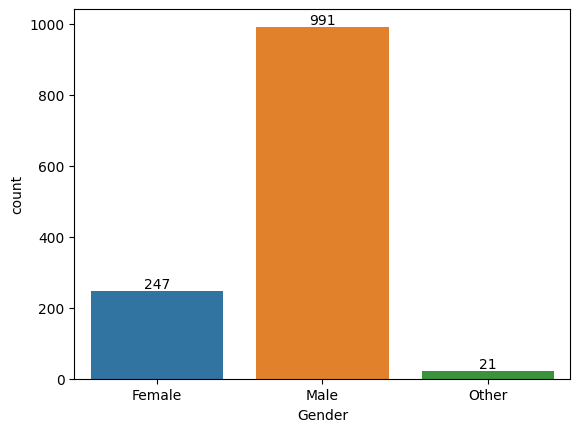

In [ ]:
plotGenderCount = sns.countplot(data= mentalHealthDF, x = 'Gender');
plotGenderCount.bar_label(plotGenderCount.containers[0]);

In [ ]:
#checking if the data has duplicates
duplCount = mentalHealthDF.duplicated().sum()

print('Total count of Duplicates in Data: ',mentalHealthDF.duplicated().sum())
if duplCount == 0:
  print('The data has no duplicates')
else:
  print('Data has duplicates - hence dropping the duplicates..')
  mentalHealthDF.drop_duplicates(inplace = True)

print('Duplicates count check after dropping - ',mentalHealthDF.duplicated().sum())

Total count of Duplicates in Data:  4
Data has duplicates - hence dropping the duplicates..
Duplicates count check after dropping -  0


In [ ]:
# examining the data under 'Age' column, by checking the unique values

mentalHealthDF['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

Since we have negative values as well as values over hundred, we shall drop those values.

In [ ]:
#dropping negative values
mentalHealthDF.drop(mentalHealthDF[mentalHealthDF['Age']<0].index, inplace = True)
#dropping values over hundred
mentalHealthDF.drop(mentalHealthDF[mentalHealthDF['Age']>100].index, inplace = True)

print('Unique values after dropping the negatives and above 100 values -')
print(mentalHealthDF['Age'].unique())

Unique values after dropping the negatives and above 100 values -
[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72]


**Exploratory Data Analysis - Data Visualization**

Taking different features and finding relevant correlations.



In [ ]:
#Encoding data prior to data analysis
from sklearn import preprocessing
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

dictionaryOfLables = {}
for feature in mentalHealthDF:
  encoderLabel = preprocessing.LabelEncoder()
  encoderLabel.fit(mentalHealthDF[feature])
  mapping = dict(zip(encoderLabel.classes_, encoderLabel.transform(encoderLabel.classes_)))
  mentalHealthDF[feature] = encoderLabel.transform(mentalHealthDF[feature])

  keyLabel = 'lab_'+ feature
  valLabel = [mapping]
  dictionaryOfLables[keyLabel] = valLabel

#Unique Values of each feature are now stored in this dictionary.

print("Dictionary of labels : \n {} \n".format(dictionaryOfLables))
print("Data set after encoding: \n")
mentalHealthDF.head()


Dictionary of labels : 
 {'lab_Age': [{5: 0, 8: 1, 11: 2, 18: 3, 19: 4, 20: 5, 21: 6, 22: 7, 23: 8, 24: 9, 25: 10, 26: 11, 27: 12, 28: 13, 29: 14, 30: 15, 31: 16, 32: 17, 33: 18, 34: 19, 35: 20, 36: 21, 37: 22, 38: 23, 39: 24, 40: 25, 41: 26, 42: 27, 43: 28, 44: 29, 45: 30, 46: 31, 47: 32, 48: 33, 49: 34, 50: 35, 51: 36, 53: 37, 54: 38, 55: 39, 56: 40, 57: 41, 58: 42, 60: 43, 61: 44, 62: 45, 65: 46, 72: 47}], 'lab_Gender': [{'Female': 0, 'Male': 1, 'Other': 2}], 'lab_Country': [{'Australia': 0, 'Austria': 1, 'Bahamas, The': 2, 'Belgium': 3, 'Bosnia and Herzegovina': 4, 'Brazil': 5, 'Bulgaria': 6, 'Canada': 7, 'China': 8, 'Colombia': 9, 'Costa Rica': 10, 'Croatia': 11, 'Czech Republic': 12, 'Denmark': 13, 'Finland': 14, 'France': 15, 'Georgia': 16, 'Germany': 17, 'Greece': 18, 'Hungary': 19, 'India': 20, 'Ireland': 21, 'Israel': 22, 'Italy': 23, 'Japan': 24, 'Latvia': 25, 'Mexico': 26, 'Moldova': 27, 'Netherlands': 28, 'New Zealand': 29, 'Nigeria': 30, 'Norway': 31, 'Philippines': 32, '

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,22,0,45,2,0,1,1,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,29,1,45,2,0,0,2,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,17,1,7,2,0,0,2,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,16,1,44,2,1,1,1,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,16,1,45,2,0,0,0,1,1,1,...,0,0,1,1,1,2,2,2,0,0


Text(0.5, 1.0, 'Treatment Distribution based on age')

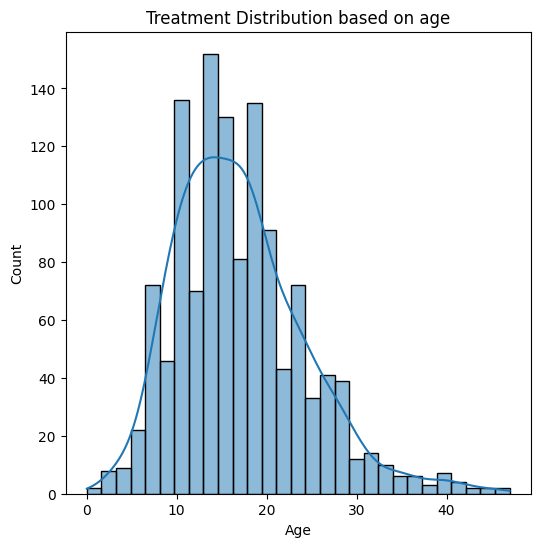

In [ ]:
# Visualizing the Age vs treatment distribution in this dataset

plt.figure(figsize = (6, 6))
sns.histplot(mentalHealthDF['Age'], kde='treatment')
plt.title("Treatment Distribution based on age")

<Axes: xlabel='treatment', ylabel='count'>

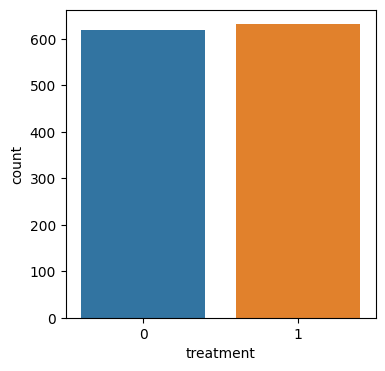

In [ ]:
# Visualizing the treatment distribution in this dataset

plt.figure(figsize = (4, 4))
sns.countplot(x='treatment', data= mentalHealthDF)


Effect of Age on Mental and Physical Health


<Axes: xlabel='phys_health_consequence', ylabel='Age'>

<Figure size 1200x1200 with 0 Axes>

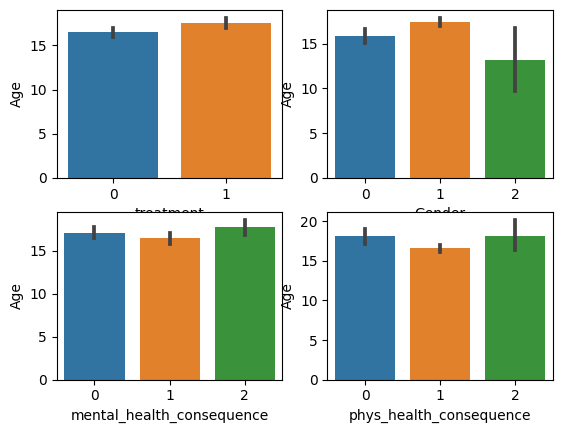

In [ ]:
plt.figure(figsize = (12, 12))
print("Effect of Age on Mental and Physical Health")
fig, axes = plt.subplots(ncols= 2, nrows = 2)
sns.barplot(x=mentalHealthDF['treatment'], y= mentalHealthDF['Age'], ax= axes[0, 0])
sns.barplot(x=mentalHealthDF['Gender'], y= mentalHealthDF['Age'], ax= axes[0, 1])
sns.barplot(x=mentalHealthDF['mental_health_consequence'], y= mentalHealthDF['Age'], ax= axes[1, 0])
sns.barplot(x=mentalHealthDF['phys_health_consequence'], y= mentalHealthDF['Age'], ax= axes[1, 1])

<ipython-input-18-49730bf6e7b3>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  j = sns.catplot(x='family_history', y = 'treatment', hue="Gender", data = mentalHealthDF, ci=None, kind='bar', palette=palette)


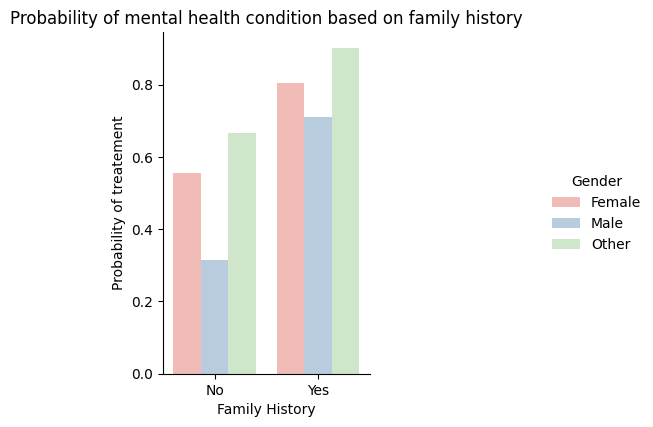

In [ ]:
i = dictionaryOfLables['lab_family_history']
palette = sns.color_palette('Pastel1')
j = sns.catplot(x='family_history', y = 'treatment', hue="Gender", data = mentalHealthDF, ci=None, kind='bar', palette=palette)
j.set_xticklabels(i[0].keys())
plt.title('Probability of mental health condition based on family history')
plt.xlabel('Family History')
plt.ylabel('Probability of treatement')

legendCorrector = dictionaryOfLables['lab_Gender']
for x, y in zip(j._legend.texts, legendCorrector[0]):
  x.set_text(y)

j.fig.subplots_adjust(top=0.8, right =0.5)
plt.show()

<ipython-input-19-73771dbbaa85>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  j = sns.catplot(x='work_interfere', y = 'treatment', hue="Gender", data = mentalHealthDF, ci=None, kind='bar', palette=palette, aspect=1.9)


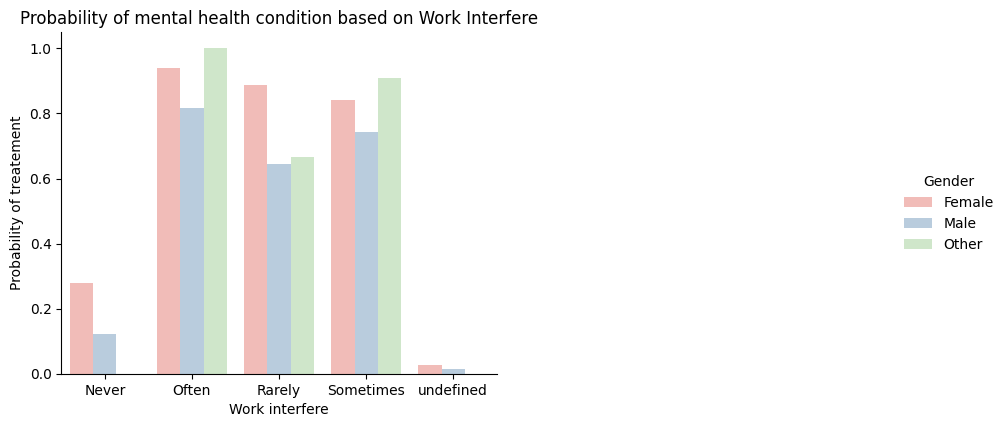

In [ ]:
i = dictionaryOfLables['lab_work_interfere']
palette = sns.color_palette('Pastel1')
j = sns.catplot(x='work_interfere', y = 'treatment', hue="Gender", data = mentalHealthDF, ci=None, kind='bar', palette=palette, aspect=1.9)
j.set_xticklabels(i[0].keys())
plt.title('Probability of mental health condition based on Work Interfere')
plt.xlabel('Work interfere')
plt.ylabel('Probability of treatement')

legendCorrector = dictionaryOfLables['lab_Gender']
for x, y in zip(j._legend.texts, legendCorrector[0]):
  x.set_text(y)

j.fig.subplots_adjust(top=0.8, right =0.5)
plt.show()

<ipython-input-20-d2e2da49bdb0>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  j = sns.catplot(x='phys_health_consequence', y = 'treatment', hue="Gender", data = mentalHealthDF, ci=None, kind='bar', palette=palette, aspect=1.9)


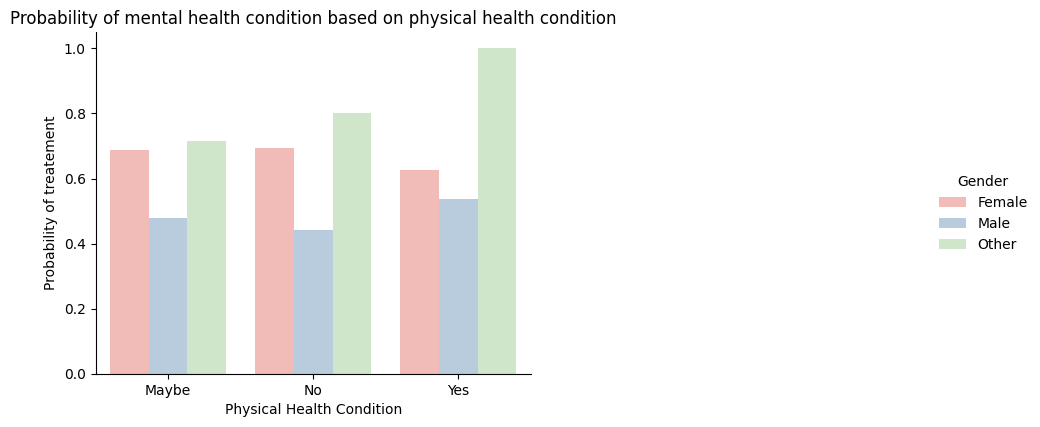

In [ ]:
i = dictionaryOfLables['lab_phys_health_consequence']
palette = sns.color_palette('Pastel1')
j = sns.catplot(x='phys_health_consequence', y = 'treatment', hue="Gender", data = mentalHealthDF, ci=None, kind='bar', palette=palette, aspect=1.9)
j.set_xticklabels(i[0].keys())
plt.title('Probability of mental health condition based on physical health condition')
plt.xlabel('Physical Health Condition')
plt.ylabel('Probability of treatement')

legendCorrector = dictionaryOfLables['lab_Gender']
for x, y in zip(j._legend.texts, legendCorrector[0]):
  x.set_text(y)

j.fig.subplots_adjust(top=0.8, right =0.5)
plt.show()

<ipython-input-21-79994cc7c69c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  j = sns.catplot(x='leave', y = 'treatment', hue="Gender", data = mentalHealthDF, ci=None, kind='bar', palette=palette, aspect=2.5)


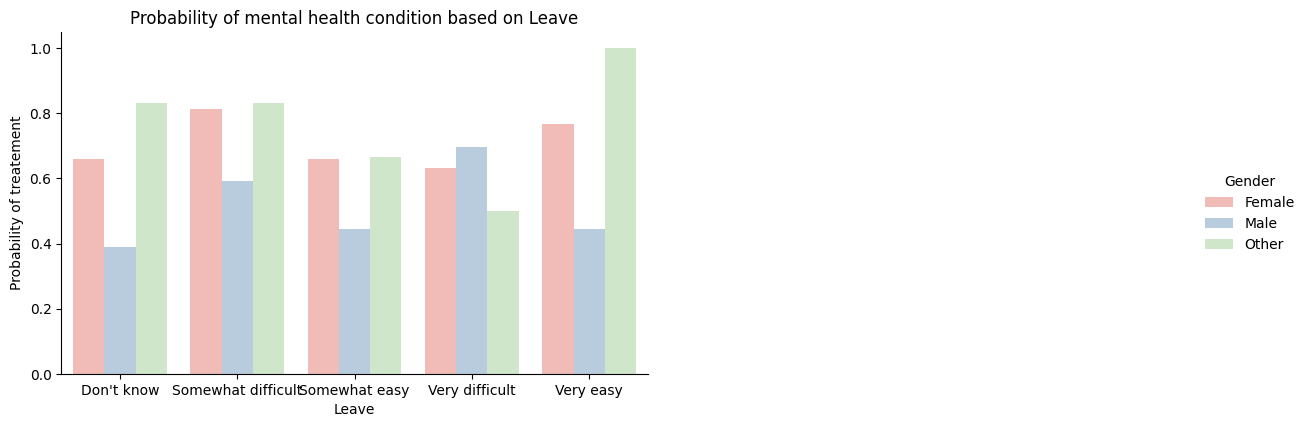

In [ ]:
i = dictionaryOfLables['lab_leave']
palette = sns.color_palette('Pastel1')
j = sns.catplot(x='leave', y = 'treatment', hue="Gender", data = mentalHealthDF, ci=None, kind='bar', palette=palette, aspect=2.5)
j.set_xticklabels(i[0].keys())
plt.title('Probability of mental health condition based on Leave')
plt.xlabel('Leave')
plt.ylabel('Probability of treatement')

legendCorrector = dictionaryOfLables['lab_Gender']
for x, y in zip(j._legend.texts, legendCorrector[0]):
  x.set_text(y)

j.fig.subplots_adjust(top=0.8, right =0.5)
plt.show()

<ipython-input-22-3d7e9c5ceaca>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  j = sns.catplot(x='mental_vs_physical', y = 'treatment', hue="Gender", data = mentalHealthDF, ci=None, kind='bar', palette=palette, aspect=2.5)


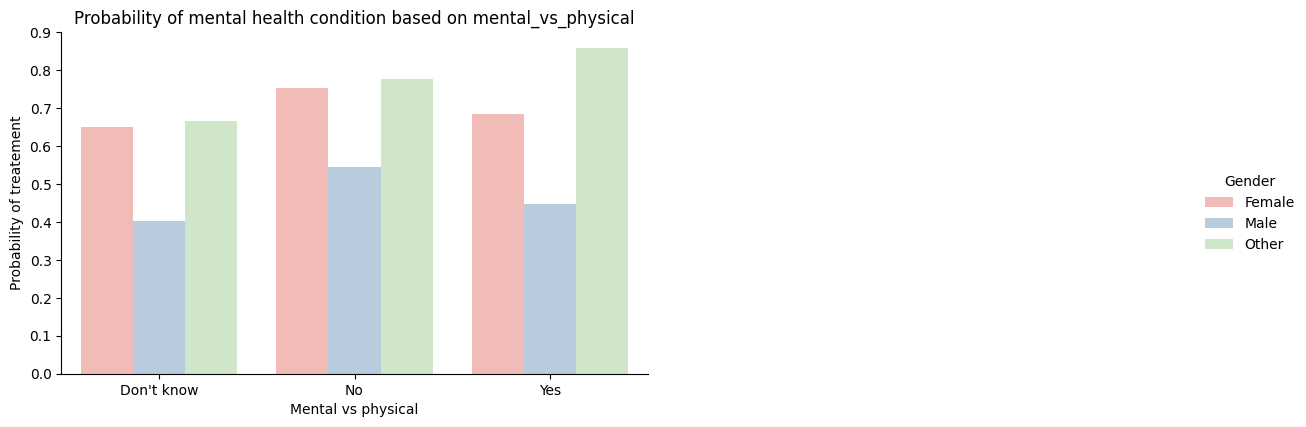

In [ ]:
i = dictionaryOfLables['lab_mental_vs_physical']
palette = sns.color_palette('Pastel1')
j = sns.catplot(x='mental_vs_physical', y = 'treatment', hue="Gender", data = mentalHealthDF, ci=None, kind='bar', palette=palette, aspect=2.5)
j.set_xticklabels(i[0].keys())
plt.title('Probability of mental health condition based on mental_vs_physical')
plt.xlabel('Mental vs physical')
plt.ylabel('Probability of treatement')

legendCorrector = dictionaryOfLables['lab_Gender']
for x, y in zip(j._legend.texts, legendCorrector[0]):
  x.set_text(y)

j.fig.subplots_adjust(top=0.8, right =0.5)
plt.show()

**Correlation Matrix**


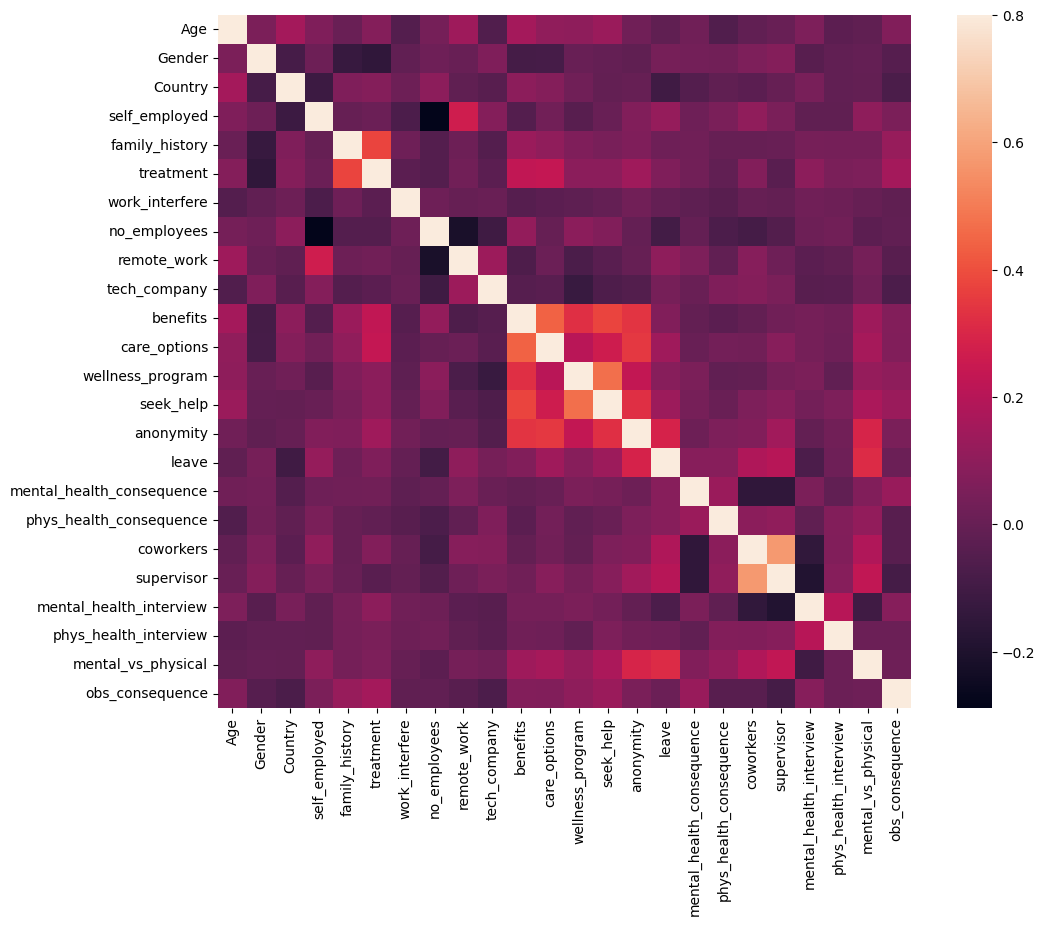

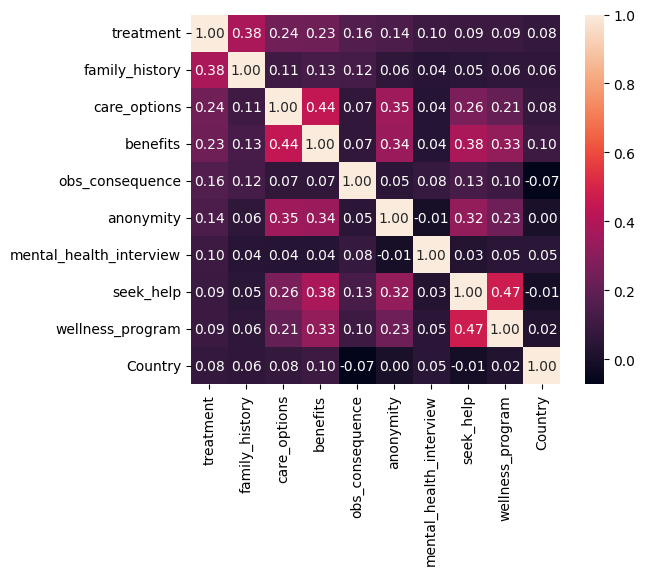

In [ ]:
correlationMatrix = mentalHealthDF.corr()
fig, axes = plt.subplots(figsize=(12,9))
sns.heatmap(correlationMatrix, vmax= 0.8, square=True)
plt.show()

k = 10
columns = correlationMatrix.nlargest(k, 'treatment')['treatment'].index
coMatrix = np.corrcoef(mentalHealthDF[columns].values.T)
heatMap = sns.heatmap(coMatrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                      yticklabels=columns.values, xticklabels= columns.values)
plt.show()

## **Predictive Analysis**

In [ ]:
#scaling age and country
scaler = MinMaxScaler()
mentalHealthDF['Age'] = scaler.fit_transform(mentalHealthDF[['Age']])
mentalHealthDF['Country'] = scaler.fit_transform(mentalHealthDF[['Country']])

In [ ]:
#Building Training and testing Dataset
from sklearn.model_selection import train_test_split

featuresConsidered = ['Age', 'Gender','self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'leave', 'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_vs_physical', 'obs_consequence']


''' ['Age', 'Gender','self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'leave', 'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_vs_physical', 'obs_consequence']'''

X = mentalHealthDF[featuresConsidered]
y = mentalHealthDF.treatment
methodEvalDict = {}

#Splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,leave,phys_health_consequence,coworkers,supervisor,mental_vs_physical,obs_consequence
1109,0.319149,1,0,0,1,4,0,1,1,0,1,1,4,0,1,1,0,0
362,0.234043,1,1,1,2,1,1,0,1,0,1,0,0,1,1,2,1,0
966,0.234043,0,1,1,3,0,1,1,1,0,1,1,4,1,1,2,2,0
97,0.340426,1,0,1,3,4,0,1,0,0,1,1,0,1,1,2,1,0
532,0.255319,0,1,1,3,0,1,1,1,0,1,1,3,0,0,0,1,0


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

def modelEvaluation(model, y_test, y_pred, plot= False):
  print('Accuracy:', metrics.accuracy_score(y_test,y_pred))
  #confusion matrix
  cm = metrics.confusion_matrix(y_test, y_pred)
  TP = cm[0,0]
  TN = cm[1,1]
  FP = cm[1,0]
  FN = cm[0,1]

  #print confusion matrix
  sns.heatmap(cm,annot= True,fmt="d")
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  #Classification accuracy and classification error
  accuracy = metrics.accuracy_score(y_test,y_pred)
  print('Classfication Accuracy: {} \n'.format( accuracy))
  print('Classfication Error: {} \n'.format(1 - accuracy))

  Recall = TP/float(TP + FP)
  Precision = TP/float(TP + TN)

  print('Recall: {} \n'.format(Recall))
  print('Precision: {} \n'.format(Precision))

  #AUC score and cross-validated AUC
  print("AUC score:", metrics.roc_auc_score(y_test,y_pred))
  if plot == True:
    print("Cross-validated AUC:", cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())

  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

  if plot == True:
    plt.figure()
    plt.plot(fpr, tpr, color="blue", label = 'ROC Curve')
    plt.plot([0,1], [0,1], color = 'red', linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for treatment')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")
    plt.show()

    print(cm)
  return accuracy





**K Nearest Neighbors Classifier**

####### KNN #######
Accuracy: 0.7380191693290735


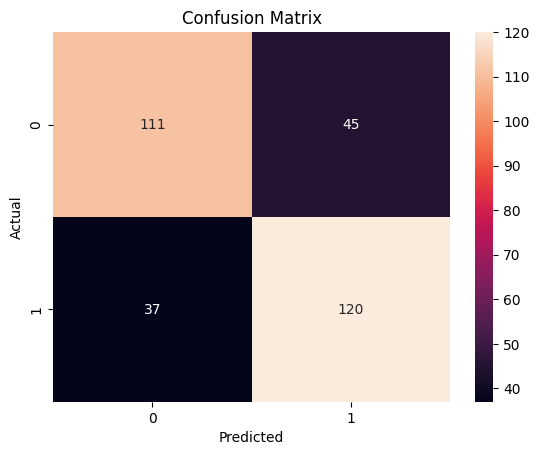

Classfication Accuracy: 0.7380191693290735 

Classfication Error: 0.2619808306709265 

Recall: 0.75 

Precision: 0.4805194805194805 

AUC score: 0.7379348358647722
Cross-validated AUC: 0.8066078720841412


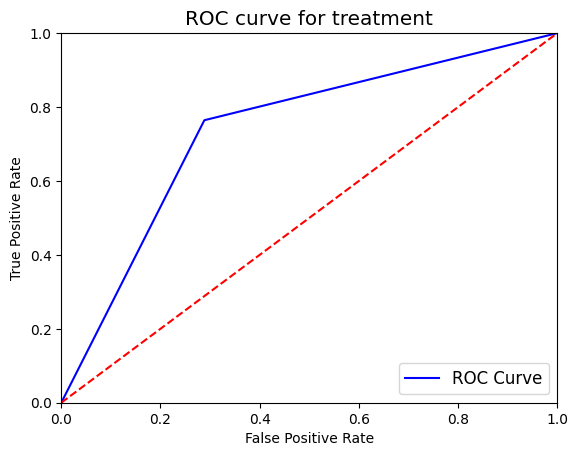

[[111  45]
 [ 37 120]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print('####### KNN #######')
knn = KNeighborsClassifier(n_neighbors=25, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = modelEvaluation(knn, y_test, y_pred, True)
methodEvalDict["KNN"] = accuracy*100



**Decision Tree**


####### Decision Tree #######
Accuracy: 0.805111821086262


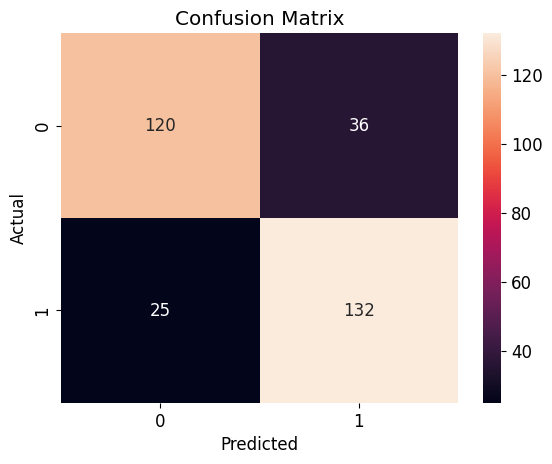

Classfication Accuracy: 0.805111821086262 

Classfication Error: 0.194888178913738 

Recall: 0.8275862068965517 

Precision: 0.47619047619047616 

AUC score: 0.8049975502204801
Cross-validated AUC: 0.8737508512020179


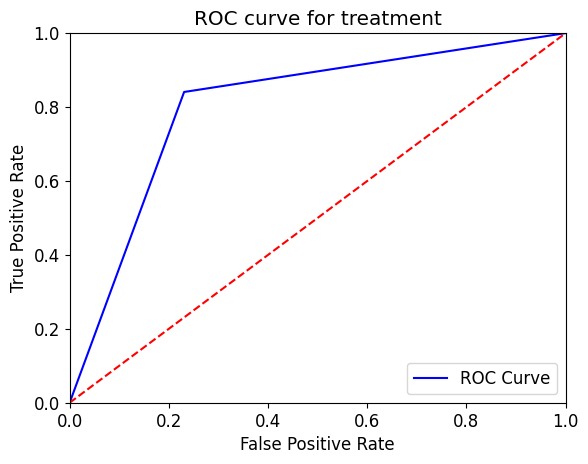

[[120  36]
 [ 25 132]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(max_depth= 7, min_samples_split = 10, max_features=8, criterion='entropy', min_samples_leaf=10)
dTree.fit(X_train, y_train)
print('####### Decision Tree #######')
y_pred = dTree.predict(X_test)
accuracy = modelEvaluation(dTree, y_test, y_pred, True )
methodEvalDict["Decision Tree"] = accuracy*100


**Random Forest Classifier**

####### Random Forest #######
Accuracy: 0.8083067092651757


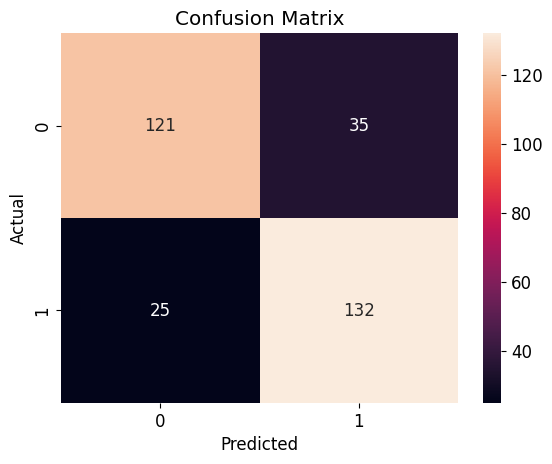

Classfication Accuracy: 0.8083067092651757 

Classfication Error: 0.19169329073482433 

Recall: 0.8287671232876712 

Precision: 0.4782608695652174 

AUC score: 0.8082026784256084
Cross-validated AUC: 0.8850156442799225


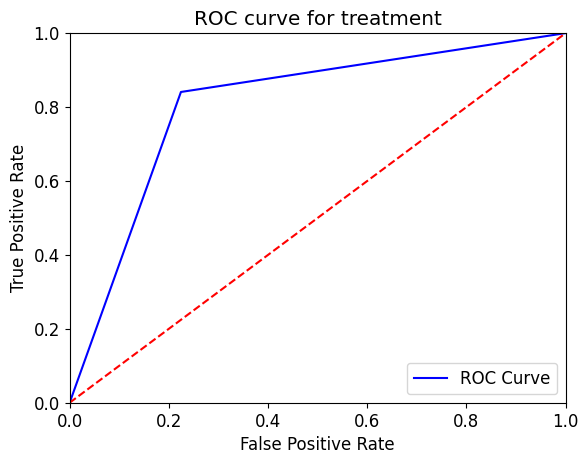

[[121  35]
 [ 25 132]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

forest = RandomForestClassifier(max_depth = 7, min_samples_leaf=6, min_samples_split= 5, n_estimators= 20, random_state= 1)
forest_model = forest.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)
print('####### Random Forest #######')
accuracy = modelEvaluation(forest_model, y_test, y_pred, True)
methodEvalDict['Random Forest'] = accuracy*100


**Boosting - AdaBoost**

####### AdaBoost #######


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7955271565495208


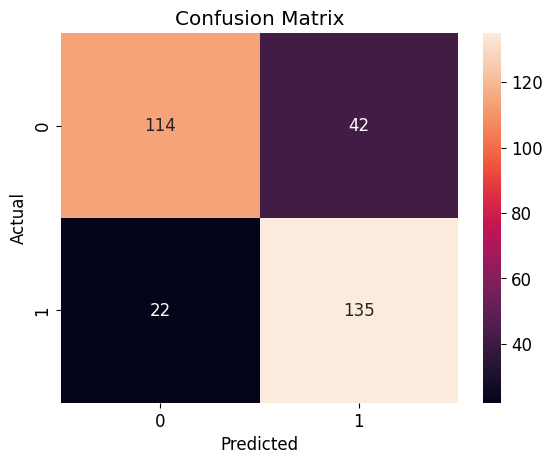

Classfication Accuracy: 0.7955271565495208 

Classfication Error: 0.20447284345047922 

Recall: 0.8382352941176471 

Precision: 0.4578313253012048 

AUC score: 0.7953209211170995


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Cross-validated AUC: 0.8754655511067462


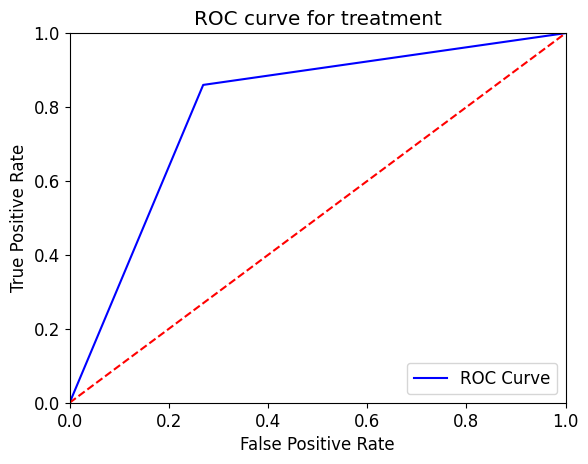

[[114  42]
 [ 22 135]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

print('####### AdaBoost #######')
firstModel = DecisionTreeClassifier(criterion='entropy', max_depth = 1 )
booster = AdaBoostClassifier(base_estimator= firstModel, n_estimators = 100)
booster.fit(X_train, y_train)
y_pred = booster.predict(X_test)
accuracy = modelEvaluation( booster, y_test, y_pred, True)
methodEvalDict["AdaBoost"] = accuracy*100

**Naive Bayes**

####### Naive Bayes #######
Accuracy: 0.7507987220447284


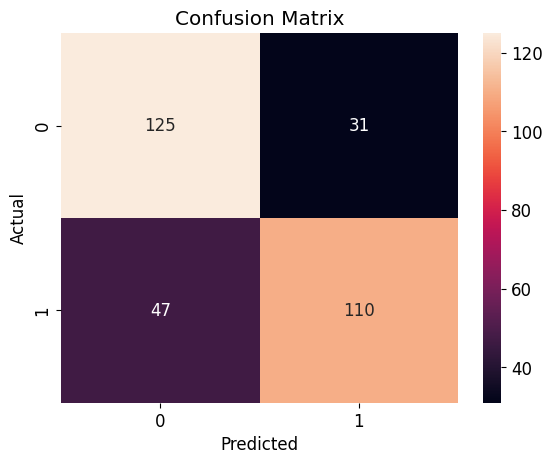

Classfication Accuracy: 0.7507987220447284 

Classfication Error: 0.24920127795527158 

Recall: 0.7267441860465116 

Precision: 0.5319148936170213 

AUC score: 0.7509594969786052
Cross-validated AUC: 0.8033431647822182


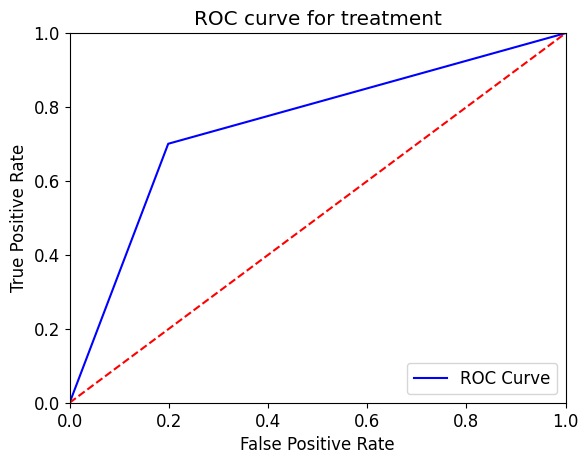

[[125  31]
 [ 47 110]]


In [ ]:
from sklearn.naive_bayes import GaussianNB

print('####### Naive Bayes #######')
naiveBayes = GaussianNB()
#booster = AdaBoostClassifier(base_estimator= firstModel, n_estimators = 5)
naiveBayes.fit(X_train, y_train)
y_pred = naiveBayes.predict(X_test)
accuracy = modelEvaluation( naiveBayes, y_test, y_pred, True)
methodEvalDict["Naive Bayes"] = accuracy*100




**Support Vector Classifier**

####### Support Vector Classifier #######
Accuracy: 0.8083067092651757


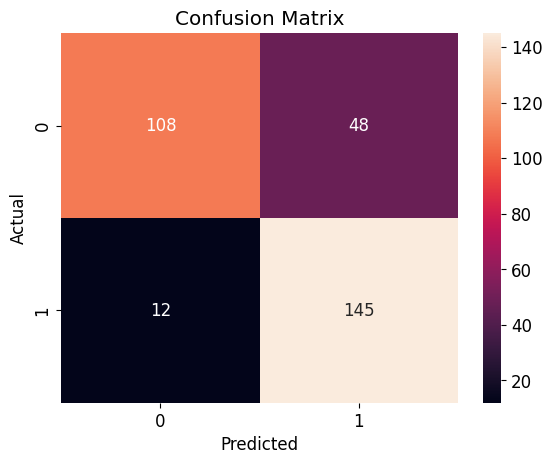

Classfication Accuracy: 0.8083067092651757 

Classfication Error: 0.19169329073482433 

Recall: 0.9 

Precision: 0.4268774703557312 

AUC score: 0.8079372856442919
Cross-validated AUC: 0.856955028728396


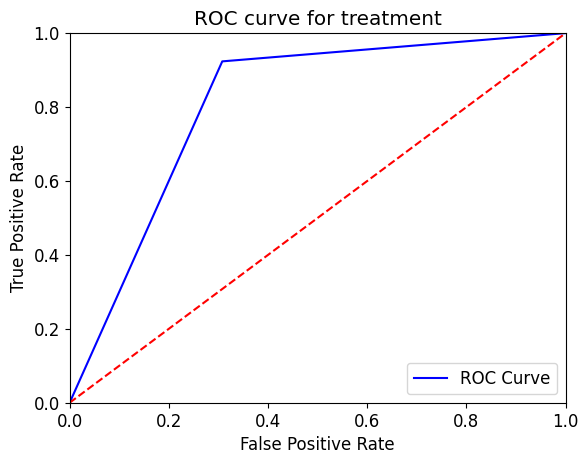

[[108  48]
 [ 12 145]]


In [ ]:
from sklearn.svm import SVC

modSvm = SVC(probability= True)

print('####### Support Vector Classifier #######')
modSvm.fit(X_train, y_train)
y_pred = modSvm.predict(X_test)
accuracy = modelEvaluation( modSvm, y_test, y_pred, True)
methodEvalDict["SVC"] = accuracy*100

# **Stacking:**

KNN + Random Forest + Naive Bayes + Logistic Regression (Meta Model)

Accuracy: 0.8178913738019169


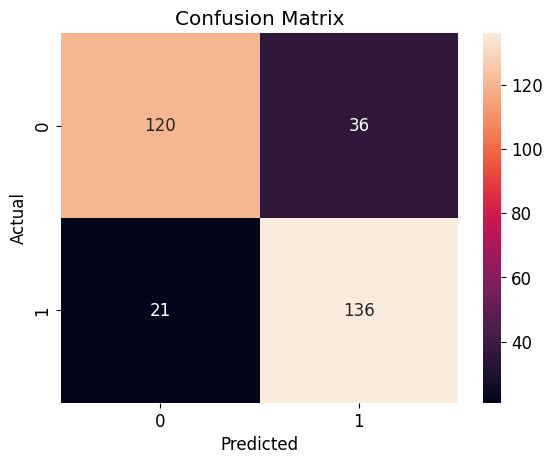

Classfication Accuracy: 0.8178913738019169 

Classfication Error: 0.1821086261980831 

Recall: 0.851063829787234 

Precision: 0.46875 

AUC score: 0.8177364037236649
Cross-validated AUC: 0.8298933426821284


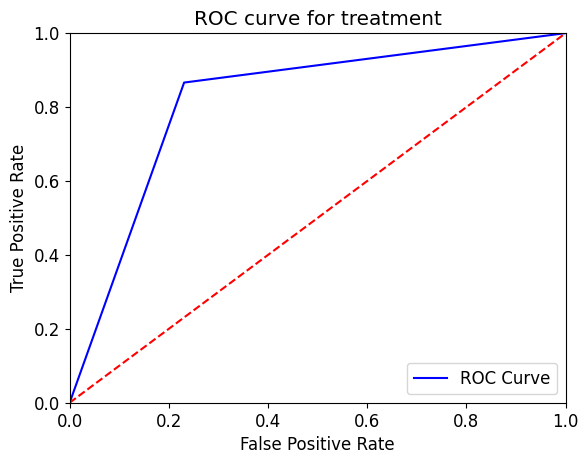

[[120  36]
 [ 21 136]]


In [ ]:
#Stacking
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression

print('####### Stacked Model #######')
model1 = KNeighborsClassifier(n_neighbors= 25)
model2 = RandomForestClassifier(max_depth= 5, n_estimators=50, random_state = 0)
model3 = GaussianNB()
meta = LogisticRegression()
combinedModel = StackingClassifier(classifiers=[model1,model2,model3], meta_classifier=meta)
combinedModel.fit(X_train, y_train)
y_pred = combinedModel.predict(X_test)
accuracy1 = modelEvaluation(combinedModel, y_test, y_pred, True)
methodEvalDict["Combined Model"] = accuracy1*100

Deep Learning and Neural Networks

In [ ]:
import tensorflow as tf
import argparse

train_steps = 1000
size_batch = 100

def shuffle_batches(features, label, batch_size):
  mh_df = tf.data.Dataset.from_tensor_slices((dict(features), label))
  return mh_df.shuffle(1000).repeat().batch(batch_size)


In [ ]:
def evaluate_input(feature, label, batch_size):
  features = dict(feature)
  if label is None:
    inputs = features
  else:
    inputs = (features, label)

  mh_df = tf.data.Dataset.from_tensor_slices(inputs)
  assert batch_size is not None, 'batch size must not be none'
  mh_df = mh_df.batch(batch_size)
  return mh_df

In [ ]:
#Creating TF feature column set. Includes same features used for all ML models implemented above. This is done to ensure accurate comparision.

age = tf.feature_column.numeric_column("Age")
gender = tf.feature_column.numeric_column("Gender")
family_history = tf.feature_column.numeric_column("family_history")
benefits = tf.feature_column.numeric_column("benefits")
care_options = tf.feature_column.numeric_column("care_options")
leave = tf.feature_column.numeric_column("leave")
work_interfere = tf.feature_column.numeric_column("work_interfere")
mental_vs_physical = tf.feature_column.numeric_column("mental_vs_physical")
phys_health_consequence = tf.feature_column.numeric_column("phys_health_consequence")
remote_work = tf.feature_column.numeric_column("remote_work")
self_employed = tf.feature_column.numeric_column("self_employed")
no_employees = tf.feature_column.numeric_column("no_employees")
tech_company = tf.feature_column.numeric_column("tech_company")
wellness_program = tf.feature_column.numeric_column("wellness_program")
seek_help = tf.feature_column.numeric_column("seek_help")
obs_consequence = tf.feature_column.numeric_column("obs_consequence")

feature_columns = [age, gender, family_history, benefits, care_options, leave, work_interfere, mental_vs_physical, phys_health_consequence, remote_work, self_employed, no_employees, tech_company, wellness_program, seek_help, obs_consequence]

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [ ]:
#Deep neural networks model
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.1, beta_1=0.999, beta_2=0.99)
mh_dnn_model = tf.estimator.DNNClassifier(feature_columns=feature_columns, hidden_units=[12,12], optimizer= opt)
mh_dnn_model.train(input_fn = lambda:shuffle_batches(X_train,y_train, size_batch),steps = train_steps)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


Instructions for updating:
Use tf.keras instead.


Accuracy: 0.8178913738019169


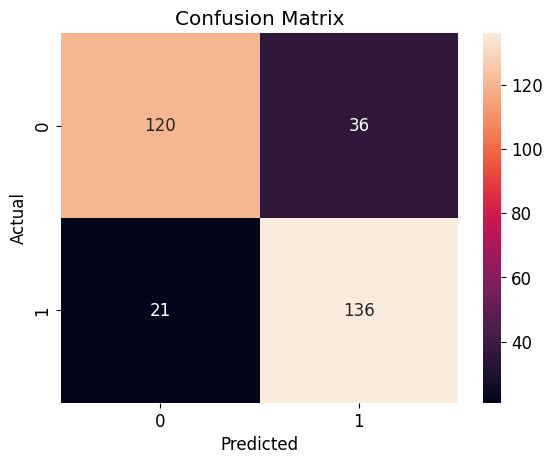

Classfication Accuracy: 0.8178913738019169 

Classfication Error: 0.1821086261980831 

Recall: 0.851063829787234 

Precision: 0.46875 

AUC score: 0.8177364037236649


In [ ]:
eval_result = mh_dnn_model.evaluate(input_fn= lambda: evaluate_input(X_test, y_test, size_batch))
accuracy = modelEvaluation(mh_dnn_model, y_test, y_pred, False)
methodEvalDict["DNN"] = accuracy*100

## **Model Performance Comparision**

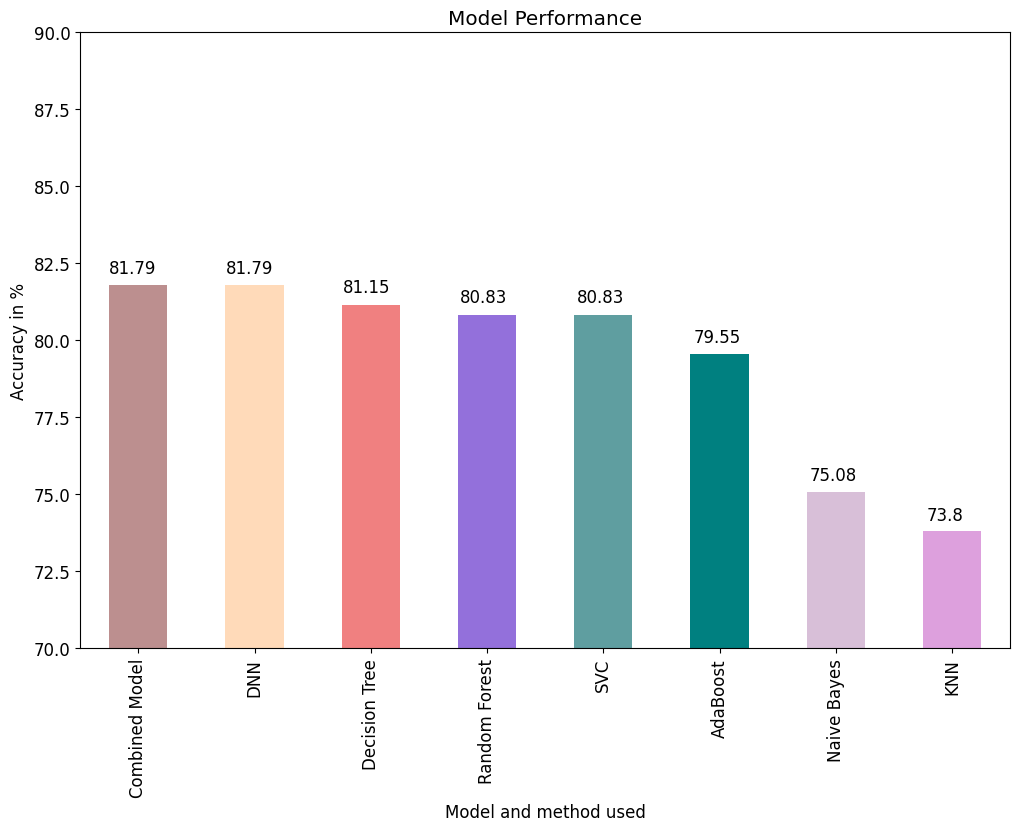

In [ ]:
successDict = pd.Series(methodEvalDict)
successDict = successDict.sort_values(ascending=False)
plt.figure(figsize=(12,8))

color=['rosybrown','peachpuff','lightcoral','mediumpurple','cadetblue','teal','thistle','plum']

axis = successDict.plot(kind='bar', color=color)
for patch in axis.patches:
  axis.annotate(str(round(patch.get_height(),2)), (patch.get_x()*1.005, patch.get_height()*1.005))


plt.ylim([70.0, 90.0])
plt.xlabel("Model and method used")
plt.ylabel("Accuracy in %")
plt.title("Model Performance")

plt.show()